In [1]:
import requests
from bs4 import BeautifulSoup

In [3]:
# web link to scrape
response = requests.get('https://www.nike.com/gb/w/mens-best-shoes-76m50znik1zy7ok')

In [4]:
# check if request ran ok (e.g 200)
response.status_code

200

In [7]:
# using the html parser to break down the html to help with filtering what will be used
soup = BeautifulSoup(response.text, 'html.parser')

In [9]:
# using inspect on web page to find the element needed 
data = soup.select('div[class="product-card__body"]')

In [10]:
data

[<div class="product-card__body" data-el-type="Card" data-testid="product-card__body"><figure><a class="product-card__link-overlay" data-testid="product-card__link-overlay" href="https://www.nike.com/gb/t/dunk-low-retro-shoe-wwlDHh/DD1391-103" tabindex="-1">Nike Dunk Low Retro</a><a aria-label="Nike Dunk Low Retro" class="product-card__img-link-overlay" data-el-type="Hero" data-testid="product-card__img-link-overlay" href="https://www.nike.com/gb/t/dunk-low-retro-shoe-wwlDHh/DD1391-103"><div class="wall-image-loader css-1la3v4n" data-testid="wall-image-loader"><noscript><img alt="Nike Dunk Low Retro Men's Shoe" class="product-card__hero-image css-1fxh5tw" height="400" loading="lazy" width="400"/></noscript></div></a><div class="product-card__info disable-animations for--product"><div class=""><div class="product-card__messaging accent--color" data-testid="product-card__messaging">Bestseller</div><div class="product-card__titles"><div class="product-card__title" id="Nike Dunk Low Retro"

In [11]:
for x in data:
    print(x.text)

Nike Dunk Low RetroBestsellerNike Dunk Low RetroMen's Shoe1 Colour£109.99
Nike Air Max PlusBestsellerNike Air Max PlusMen's Shoes1 Colour£174.99
Nike React VisionBestsellerNike React VisionMen's Shoe1 Colour£129.99
Nike Air Force 1 '07BestsellerNike Air Force 1 '07Men's Shoes1 Colour£109.95
Nike Air Max Plus IIIBestsellerNike Air Max Plus IIIMen's Shoes1 Colour£174.99
Nike Air Force 1 '07BestsellerNike Air Force 1 '07Men's Shoes1 Colour£109.99
Nike Revolution 6BestsellerNike Revolution 6Men's Road Running Shoes1 Colour£41.99£59.95
Jordan Max Aura 5BestsellerJordan Max Aura 5Men's Shoes2 Colours£59.99£119.95
Nike Air Max PlusBestsellerNike Air Max PlusMen's Shoes1 Colour£174.99
Nike Air Max TWBestsellerNike Air Max TWMen's Shoes1 Colour£72.49£144.99
Nike Mercurial Superfly 9 Academy By YouCustomiseBestsellerNike Mercurial Superfly 9 Academy By YouCustom Firm-Ground Football Boot4 Colours£119.95
Nike Phantom Luna 2 Academy By YouCustomiseBestsellerNike Phantom Luna 2 Academy By YouCustom

In [39]:
import re

# cleaning up the bester seller list

# Initialize an empty string to store the output
output = ""

for x in data:
    # Extracting text
    text = x.text.strip()
    # Check if "Bestseller" is present in the text
    if 'Bestseller' in text:
        # Split the text by the word "Bestseller"
        parts = text.split("Bestseller")
        # Take the second part which contains the text after "Bestseller"
        product_info = parts[-1].strip()
    else:
        # If "Bestseller" is not found, consider the entire text as product info
        product_info = text
    # Remove the words "Just In" if found in the text
    product_info = product_info.replace("Just In", "").strip()
    # Find the position of "YouCustomise"
    customise_index = product_info.find("YouCustomise")
    # Extract the text after "YouCustomise" (excluding it)
    if customise_index != -1:
        product_info = product_info[customise_index + len("YouCustomise"):].strip()
    # Split the product info by the word "Colour" or "Colours"
    parts = product_info.split("Colour")
    # Take the first part which contains the product name
    product_name = parts[0].strip()
    # Take the last part which contains the price information
    price_info = parts[-1].strip()
    # Remove the pound sign from price info and remove any 's' after the pound sign
    price_info = price_info.replace('£', '').replace('s', '').strip()
    # Extract the first price (truncated to two decimal places)
    prices = re.findall(r'\d+\.\d{2}', price_info)
    if prices:
        price = '£' + "{:.2f}".format(float(prices[0]))
    else:
        price = ''
    # Add a space before "Men's"
    product_name = product_name.replace("Men's", " Men's")
    # Append the product name along with the extracted price to the output
    output += product_name + ' ' + price + '\n'

print(output)

Nike Dunk Low Retro Men's Shoe1 £109.99
Nike Air Max Plus Men's Shoes1 £174.99
Nike React Vision Men's Shoe1 £129.99
Nike Air Force 1 '07 Men's Shoes1 £109.95
Nike Air Max Plus III Men's Shoes1 £174.99
Nike Air Force 1 '07 Men's Shoes1 £109.99
Nike Revolution 6 Men's Road Running Shoes1 £41.99
Jordan Max Aura 5 Men's Shoes2 £59.99
Nike Air Max Plus Men's Shoes1 £174.99
Nike Air Max TW Men's Shoes1 £72.49
Nike Mercurial Superfly 9 Academy By YouCustom Firm-Ground Football Boot4 £119.95
Nike Phantom Luna 2 Academy By YouCustom MG High-Top Football Boot2 £114.99
Air Jordan 1 Mid Men's Shoes1 £90.99
Air Jordan 1 Mid SE Men's shoes1 £139.95
Nike Dunk Low Men's Shoes1 £59.99
Nike Air Force 1 '07 Men's Shoes1 £59.99
Nike Air Force 1 Low By YouCustom  Men's Shoes3 £134.99
Sabrina 1 By YouCustom Basketball Shoes3 £144.99
Nike Pegasus Trail 4 GORE-TEX By YouCustom Waterproof Trail-Running Shoes2 £174.99
Nike Air Max 1 By YouCustom Shoes1 £174.99
Sabrina 1 By SabrinaCustom Basketball Shoes1 £144.

In [42]:
top_sellers = output

# Count the occurrences of £ in the top sellers variable
count_top_sellers = top_sellers.count('£')

print("Total number of top sellers:", count_top_sellers)

Total number of top sellers: 23


In [43]:
# Count occurrences of 'Custom' in the top sellers variable
custom_count = top_sellers.count('Custom')

print("Number of occurrences of 'Custom':", custom_count)

Number of occurrences of 'Custom': 9


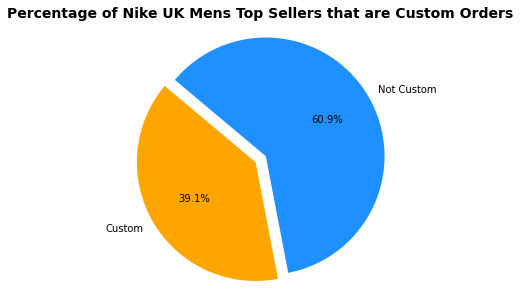

In [49]:
import matplotlib.pyplot as plt

# Calculate percentage of top sellers that are custom
custom_percentage = (custom_count / count_top_sellers) * 100

# Calculate percentage of top sellers that are not custom
non_custom_percentage = 100 - custom_percentage

# Pie chart data
labels = ['Custom', 'Not Custom']
sizes = [custom_percentage, non_custom_percentage]
colors = ['#FFA500', '#1E90FF'] 
explode = (0.1, 0)  # explode the 1st slice (Custom)

# Plotting the pie chart
plt.figure(figsize=(8, 5))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Percentage of Nike UK Mens Top Sellers that are Custom Orders', fontsize=14, fontweight='bold')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()